In [9]:
import numpy as np
from transform_helpers import *
# %gui qt5
# from spimagine import volshow

In [11]:
# Z, Y, X
test_vol = np.zeros((200,400,800), dtype = np.uint16)

In [12]:
# put origin in the centre

imprint_coordinate_system(test_vol, ( 100, 200, 400))

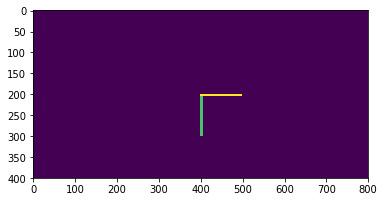

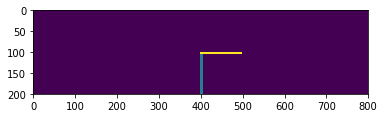

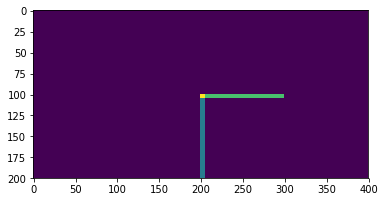

In [13]:

plot_all(get_projections(test_vol))

In [14]:
# volshow(test_vol)

In [15]:
import gputools
import scipy.ndimage

In [30]:
move_z = np.eye(4)
move_z[0,3]  = -100
move_z

array([[   1.,    0.,    0., -100.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]])

In [35]:
gpu_trans_mz = gputools.affine(test_vol, move_z)

In [36]:
scipy_trans_mz = scipy.ndimage.affine_transform(test_vol, move_z)

#  scipy actually expects the affine transform from output to input, i.e. the inverse

In [37]:
scipy_trans_mz_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_z))

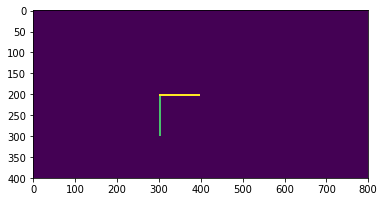

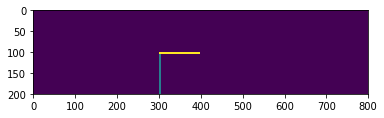

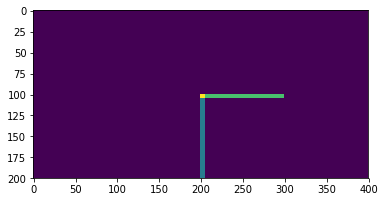

In [38]:
plot_all(get_projections(gpu_trans_mz))

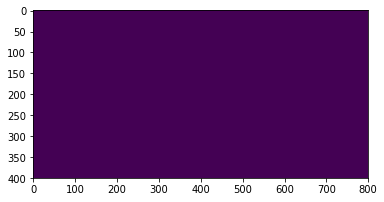

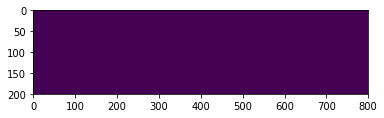

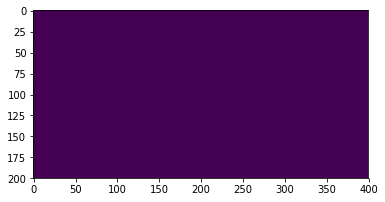

In [39]:
plot_all(get_projections(scipy_trans_mz))

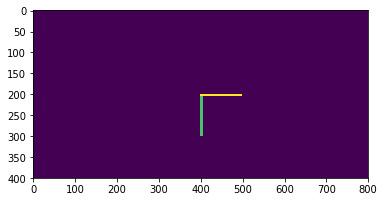

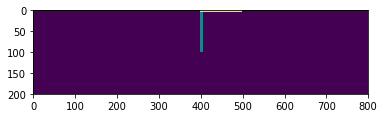

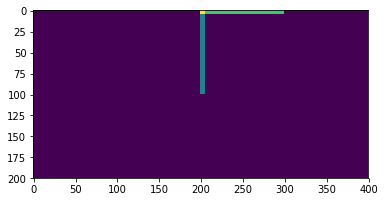

In [40]:
plot_all(get_projections(scipy_trans_mz_inv))

In [44]:
move_y = np.eye(4)
move_y[1,3]  = -200
move_y

array([[   1.,    0.,    0.,    0.],
       [   0.,    1.,    0., -200.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]])

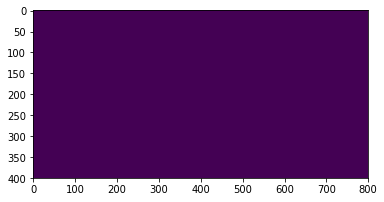

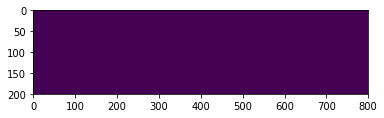

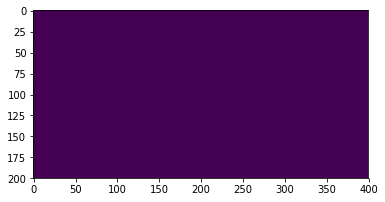

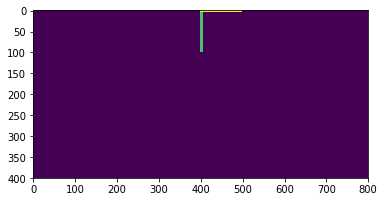

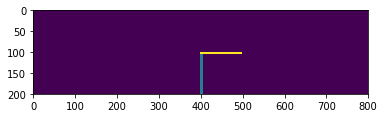

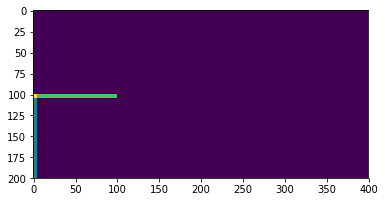

In [46]:
gpu_trans_my = scipy.ndimage.affine_transform(test_vol, move_y)
scipy_trans_my_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_y))
plot_all(get_projections(gpu_trans_my))
plot_all(get_projections(scipy_trans_my_inv))

In [47]:
move_x = np.eye(4)
move_x[2,3]  = -400
move_x

array([[   1.,    0.,    0.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    1., -400.],
       [   0.,    0.,    0.,    1.]])

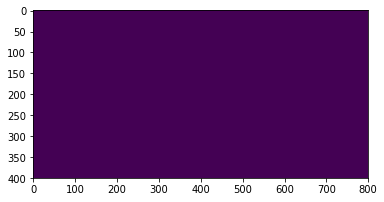

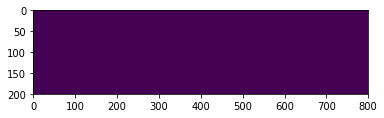

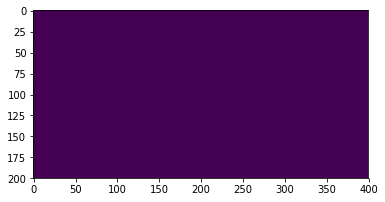

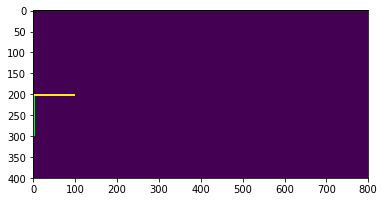

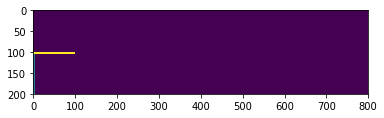

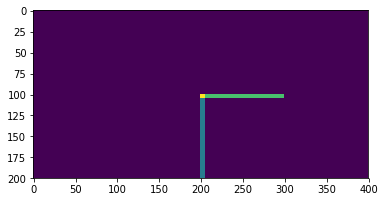

In [48]:
gpu_trans_mx = scipy.ndimage.affine_transform(test_vol, move_x)
scipy_trans_mx_inv = scipy.ndimage.affine_transform(test_vol, scipy.linalg.inv(move_x))
plot_all(get_projections(gpu_trans_mx))
plot_all(get_projections(scipy_trans_mx_inv))

##  Now try and find out how to get gputools transforms working as expected ....


* shifting dimension 0 (Z) has actually shifted dimension 2 (X)
* use smaller shifts to get to the bottom of it

In [54]:
shift_all = np.eye(4)
shift_all[0,3] = -10
shift_all[1,3] = -40
shift_all[2,3] = -90
shift_all


array([[  1.,   0.,   0., -10.],
       [  0.,   1.,   0., -40.],
       [  0.,   0.,   1., -90.],
       [  0.,   0.,   0.,   1.]])

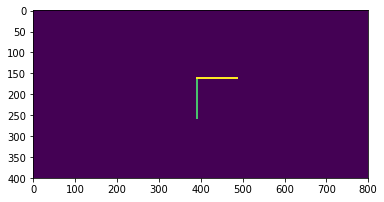

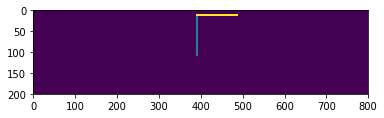

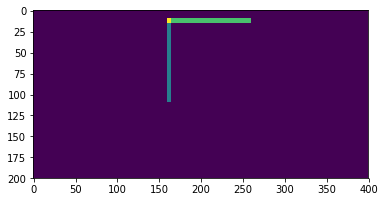

In [55]:
gpu_trans_all = gputools.affine(test_vol, shift_all)
plot_all(get_projections(gpu_trans_all))


So it appears that 
* the shift of 10 happens along dimension 2 (supposed to be along dimension 0)
* the shift of 40 happens along dimension 1 (supposed to be along dimension 1)
* the shift of 90 happens along dimension 0 (supposed to be along 
dimension 2)